In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
import numpy as np

In [4]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [5]:
len(xtrain)

60000

In [6]:
len(xtest)

10000

In [7]:
xtrain[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

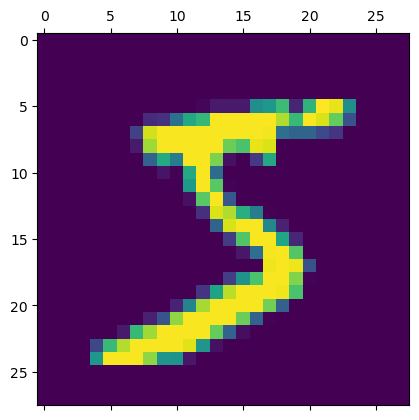

In [8]:
plt.matshow(xtrain[0])

In [9]:
ytrain[0]

5

In [10]:
xtrain=xtrain/255
xtest=xtest/255

In [11]:
xtrain.shape

(60000, 28, 28)

In [12]:
xflatered=xtrain.reshape(len(xtrain),28*28)

In [13]:

xflatered.shape

(60000, 784)

In [14]:
xflatered2=xtest.reshape(len(xtest),28*28)

In [15]:
xflatered2.shape

(10000, 784)

In [16]:
xflatered=xtrain.reshape(len(xtrain),28*28)

In [17]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(xflatered, ytrain, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 3s 1ms/step - loss: 0.4687 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3042 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9256


In [18]:
model.evaluate(xflatered2,ytest)

313/313 [==============================] - 1s 1ms/step - loss: 0.2676 - accuracy: 0.9257


[0.2676088213920593, 0.9257000088691711]

In [19]:
ypredicted=model.predict(xflatered2)

313/313 [==============================] - 1s 1ms/step


In [20]:
ypredicted[0]

array([1.75852180e-02, 4.12377062e-07, 4.70815673e-02, 9.39949512e-01,
       2.52504274e-03, 1.15504846e-01, 1.44613148e-06, 9.99775887e-01,
       1.05274297e-01, 6.09508395e-01], dtype=float32)

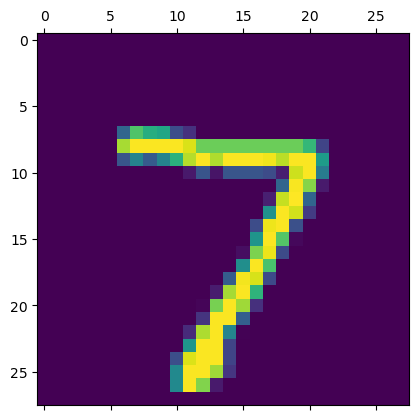

In [21]:
plt.matshow(xtest[0])

In [22]:
np.argmax(ypredicted[0])

7

In [23]:
ypredictedlabels=[np.argmax(i)for i in ypredicted]

In [24]:
ypredictedlabels[:6]

[7, 2, 1, 0, 4, 1]

cm tf.confusion_matrix(labrels=ytest,predications=ypredicatedlabels)

In [25]:
cm = tf.math.confusion_matrix(labels=ytest,predictions=ypredictedlabels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    0,    2,    0,    5,    7,    3,    4,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   4,   10,  918,   16,    7,    4,   13,   11,   45,    4],
       [   2,    0,   19,  918,    0,   24,    2,   12,   27,    6],
       [   1,    1,    4,    1,  908,    0,   12,    4,   10,   41],
       [   8,    3,    3,   33,    7,  768,   14,    8,   42,    6],
       [   9,    3,    6,    1,    7,   11,  915,    2,    4,    0],
       [   1,    8,   20,    6,    5,    0,    0,  953,    5,   30],
       [   4,    9,    6,   18,    9,   17,    8,   10,  887,    6],
       [   9,    7,    1,   10,   23,    7,    0,   21,   14,  917]])>

Text(95.72222222222221, 0.5, 'Truth')

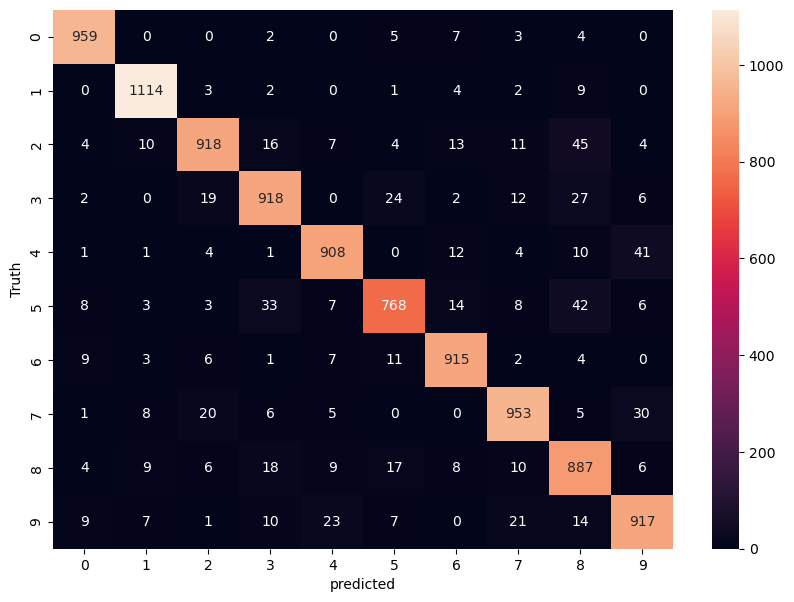

In [28]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [32]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(xflatered, ytrain, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2720 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1228 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0856 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9839


In [33]:
model.evaluate(xflatered2,ytest)
ypredicted=model.predict(xflatered2)
ypredictedlabels=[np.argmax(i)for i in ypredicted]
cm = tf.math.confusion_matrix(labels=ytest,predictions=ypredictedlabels)
cm

313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    1,    2,    1,    3,    0,    1,    4],
       [   0, 1125,    2,    1,    0,    0,    3,    0,    4,    0],
       [   7,    2, 1004,    2,    2,    0,    3,    5,    6,    1],
       [   1,    0,    3,  990,    1,    3,    0,    2,    9,    1],
       [   0,    0,    2,    0,  962,    0,    4,    2,    1,   11],
       [   3,    1,    0,   13,    2,  858,    6,    0,    7,    2],
       [   4,    3,    0,    1,    4,    2,  942,    0,    2,    0],
       [   0,    4,    8,    2,    3,    0,    0,  983,    7,   21],
       [   2,    0,    3,    4,    4,    2,    1,    1,  951,    6],
       [   1,    4,    0,    6,    7,    1,    0,    3,    1,  986]])>

Text(95.72222222222221, 0.5, 'Truth')

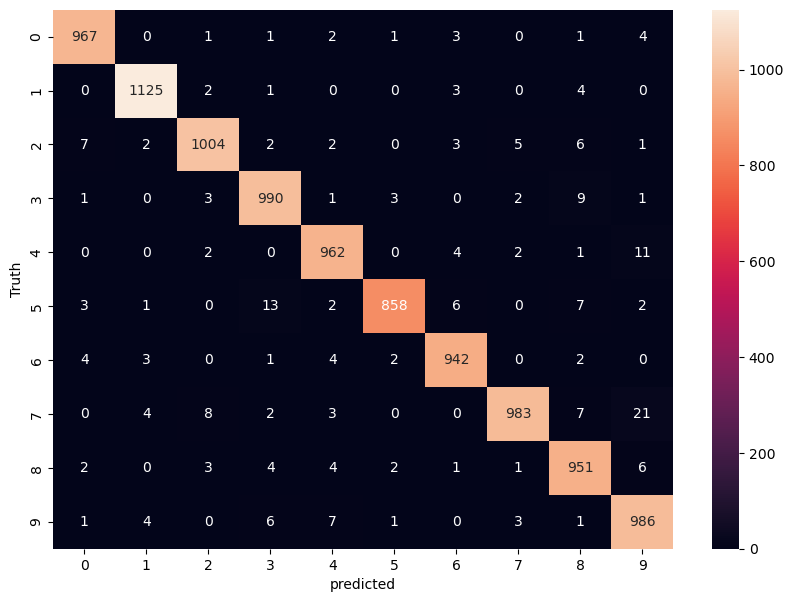

In [34]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2767 - accuracy: 0.9208
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1229 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0852 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0651 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0500 - accuracy: 0.9849
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0420 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0335 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0279 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0224 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [37]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0885 - accuracy: 0.9773


[0.0885281190276146, 0.9772999882698059]